In [ ]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package google-drive-ocamlfuse.
(Reading database ... 144619 files and directories currently installed.)
Preparing to unpack .../google-drive-ocamlfuse_0.7.22-0ubuntu3~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.22-0ubuntu3~ubuntu18.04.1) ...
Setting up google-drive-ocamlfuse (0.7.22-0ubuntu3~ubuntu18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope

In [ ]:
!mkdir -p drive
!google-drive-ocamlfuse drive
import os
os.chdir('/content/drive/Hangi Kredi')

# DATA
The classification goal is to predict if the customer will subscribe (yes/no) to a term deposit (variable y). Dataset provides the customer information. It includes 40000 records and 14 fields.

# Inputs
* age : age of customer (numeric)
* job : type of job (categorical
* marital : marital status (categorical)
* education (categorical)
* default: has credit in default? (binary)
* balance: average yearly balance, in euros (numeric)
* housing: has a housing loan? (binary)
* loan: has personal loan? (binary)
* contact: contact communication type (categorical)
* day: last contact day of the month (numeric)
* month: last contact month of year (categorical)
* duration: last contact duration, in seconds (numeric)
* campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

#Output
* y - has the client subscribed to a term deposit? (binary)

In [ ]:
import pandas as pd
data = pd.read_csv('term-deposit-marketing-2020.csv')
data.info()
print(data.shape)
print(data.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        40000 non-null  int64 
 1   job        40000 non-null  object
 2   marital    40000 non-null  object
 3   education  40000 non-null  object
 4   default    40000 non-null  object
 5   balance    40000 non-null  int64 
 6   housing    40000 non-null  object
 7   loan       40000 non-null  object
 8   contact    40000 non-null  object
 9   day        40000 non-null  int64 
 10  month      40000 non-null  object
 11  duration   40000 non-null  int64 
 12  campaign   40000 non-null  int64 
 13  y          40000 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.3+ MB
(40000, 14)
Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'y'],
      dtype='object')


In [ ]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no



Let's convert y values ​​to numerical values.

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = data.loc[:, data.columns == 'y']
le.fit(y)
data.loc[:, data.columns == 'y'] = le.transform(y)
data.tail(3)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
39997,54,admin,divorced,secondary,no,200,no,no,cellular,3,jun,170,1,1
39998,34,management,married,tertiary,no,1047,no,no,cellular,3,jun,342,1,0
39999,38,technician,married,secondary,no,1442,yes,no,cellular,3,jun,113,1,0


In [ ]:
data.describe()

,age,balance,day,duration,campaign,y
count,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,40.544600,1274.277550,16.017225,254.824300,2.882175,0.072400
std,9.641776,2903.769716,8.278127,259.366498,3.239051,0.259152
min,19.000000,-8019.000000,1.000000,0.000000,1.000000,0.000000
25%,33.000000,54.000000,8.000000,100.000000,1.000000,0.000000
50%,39.000000,407.000000,17.000000,175.000000,2.000000,0.000000
75%,48.000000,1319.000000,21.000000,313.000000,3.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,1.000000



Let's check the null values ​​in the dataset.

In [ ]:
print(data.isnull().sum().sort_values(ascending=False))

y            0
campaign     0
duration     0
month        0
day          0
contact      0
loan         0
housing      0
balance      0
default      0
education    0
marital      0
job          0
age          0
dtype: int64


#Understanding data

In [ ]:
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
import matplotlib.pyplot as plt 


Let's check if the dataset is balanced.

In [ ]:
nonSubscribers = len(data[data['y']==0])
Subscribers = len(data[data['y']==1])
print('Percentage of non-subscribers : {}'.format((nonSubscribers/len(data['y']))*100))
print('Percentage of subscribers : {}'.format((Subscribers/len(data['y']))*100))

Percentage of non-subscribers : 92.75999999999999
Percentage of subscribers : 7.24



Oops! Classes are unbalanced.

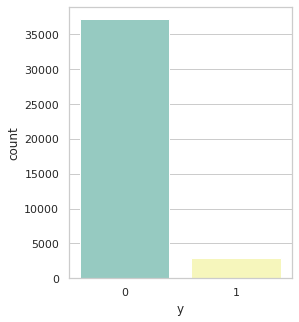

In [ ]:
plt.figure(figsize=(4,5))
ax = sns.countplot(x='y',data=data,palette='Set3')
plt.show()


We will solve this problem soon. But first, let's understand the data a little more.

We can calculate categorical means for other categorical variables such as education and marital status to get a more detailed sense of our data.

In [ ]:
data.groupby('y').mean()

,age,balance,day,duration,campaign
y,,,,,
0,40.599208,1249.752533,16.032072,221.408042,2.918688
1,39.844959,1588.495856,15.827003,682.958564,2.414365


In [ ]:
data.groupby('job').mean()

,age,balance,day,duration,campaign,y
job,,,,,,
admin,39.259648,1071.794111,15.810841,248.872853,2.698416,0.078296
blue-collar,40.040286,1056.803155,15.493765,262.297453,2.855057,0.057018
entrepreneur,41.957295,1452.220641,15.859786,255.159431,2.837722,0.062633
housemaid,45.443422,1327.157314,16.282429,243.590616,2.936523,0.048758
management,40.443669,1688.052902,16.450771,249.269900,3.017144,0.082782
retired,57.185108,1513.709116,15.897704,257.075157,2.649269,0.105080
self-employed,40.630835,1513.509194,16.236917,266.775813,2.959689,0.079208
services,38.868286,977.701279,15.779284,257.636573,2.779795,0.060870
student,27.561069,1288.769084,15.213740,238.671756,2.643130,0.156489


In [ ]:
data.groupby('education').mean()

,age,balance,day,duration,campaign,y
education,,,,,,
primary,44.523923,1133.186284,15.455821,250.425040,2.914673,0.056300
secondary,39.666889,1097.668032,15.937360,256.493879,2.798552,0.067546
tertiary,39.478404,1660.930930,16.465376,254.698465,2.998929,0.091826
unknown,44.086871,1443.688439,16.131287,250.868713,3.041150,0.062704


Job title can be a good predictor of the outcome variable because frequencies heavily dependent on job title.

Text(0, 0.5, 'Frequency')

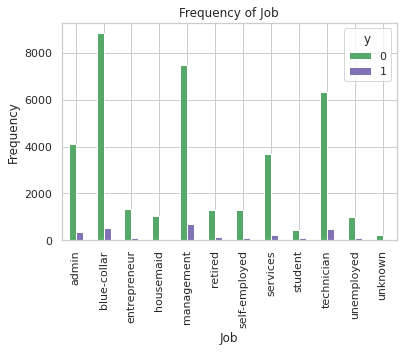

In [ ]:
pd.crosstab(data.job,data.y).plot(kind='bar',color=['g','m'])
plt.title('Frequency of Job')
plt.xlabel('Job')
plt.ylabel('Frequency')

Education can be a good predictor of the outcome variable because frequencies heavily dependent on education level.

Text(0, 0.5, 'Frequency')

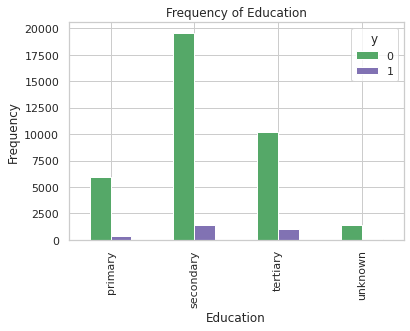

In [ ]:
pd.crosstab(data.education,data.y).plot(kind='bar',color=['g','m'])
plt.title('Frequency of Education')
plt.xlabel('Education')
plt.ylabel('Frequency')

Day may not be a good predictor.

Text(0, 0.5, 'Frequency')

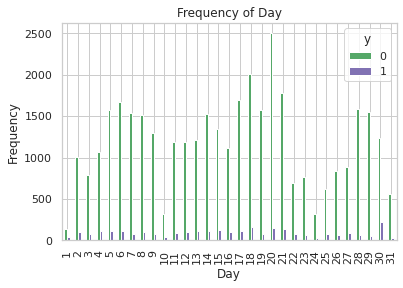

In [ ]:
pd.crosstab(data.day,data.y).plot(kind='bar',color=['g','m'])
plt.title('Frequency of Day')
plt.xlabel('Day')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

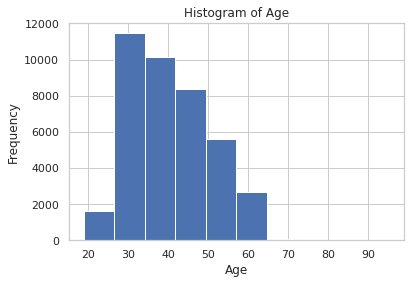

In [ ]:
data.age.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

#Creating Dummy Variables

In [ ]:
categoricVars = ['job','marital','education','default','housing','loan','contact','month']
for var in categoricVars:
    categoricList = 'var'+'_'+ var
    categoricList = pd.get_dummies(data[var], prefix=var)
    dataNew = data.join(categoricList)
    data = dataNew
dataVars=data.columns.values.tolist()
toKeep=[i for i in dataVars if i not in categoricVars]
data = data[toKeep]
data.columns.values

array(['age', 'balance', 'day', 'duration', 'campaign', 'y', 'job_admin',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_divorced', 'marital_married',
       'marital_single', 'education_primary', 'education_secondary',
       'education_tertiary', 'education_unknown', 'default_no',
       'default_yes', 'housing_no', 'housing_yes', 'loan_no', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'contact_unknown',
       'month_apr', 'month_aug', 'month_dec', 'month_feb', 'month_jan',
       'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov',
       'month_oct'], dtype=object)

In [ ]:
X = data.loc[:, data.columns != 'y']
y = data.loc[:, data.columns == 'y']

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=0)
smoteX,smoteY=smote.fit_sample(X, y)
smotedX = pd.DataFrame(data=smoteX,columns=X.columns )
smotedY= pd.DataFrame(data=smoteY,columns=['y'])
print('length of oversampled data is {}.'.format(len(smotedX)))
print('Number of non-subscription in oversampled data is {}.'.format(len(smotedY[smotedY['y']==0])))
print('Number of subscription is {}.'.format(len(smotedY[smotedY['y']==1])))
print('Proportion of non-subscription data in oversampled data is {}.'.format(len(smotedY[smotedY['y']==0])/len(smotedX)))
print('Proportion of subscription data in oversampled data is {}.'.format(len(smotedY[smotedY['y']==1])/len(smotedX)))

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)

length of oversampled data is 74208.
Number of non-subscription in oversampled data is 37104.
Number of subscription is 37104.
Proportion of non-subscription data in oversampled data is 0.5.
Proportion of subscription data in oversampled data is 0.5.


In [ ]:
data=data.columns.values.tolist()
y=['y']
X=[i for i in data if i not in y]
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
rfe = RFE(lr, 20)
rfe = rfe.fit(smotedX, smotedY.values.ravel())

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Let's select features with using RFE.

In [ ]:
cols = [smotedX.columns[i] for i in range(len(rfe.support_)) if rfe.support_[i]] 
X=smotedX[cols]
y=smotedY['y']
print(cols)

['job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_self-employed', 'job_services', 'job_technician', 'job_unemployed', 'marital_divorced', 'marital_married', 'marital_single', 'education_primary', 'education_secondary', 'education_tertiary', 'education_unknown', 'housing_no', 'housing_yes', 'contact_cellular', 'contact_telephone', 'contact_unknown']


In [ ]:
import statsmodels.api as sm
logitModel=sm.Logit(y,X)
print(logitModel.fit().summary2())

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Optimization terminated successfully.
         Current function value: 0.489149
         Iterations 7
                           Results: Logit
Model:               Logit             Pseudo R-squared:  0.294     
Dependent Variable:  y                 AIC:               72637.4696
Date:                2020-09-29 22:42  BIC:               72821.7622
No. Observations:    74208             Log-Likelihood:    -36299.   
Df Model:            19                LL-Null:           -51437.   
Df Residuals:        74188             LLR p-value:       0.0000    
Converged:           1.0000            Scale:             1.0000    
No. Iterations:      7.0000                                         
--------------------------------------------------------------------
                     Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
--------------------------------------------------------------------
job_blue-collar     -1.7507   0.0334 -52.4305 0.0000 -1.8161 -1.6852
job_entrepreneur    -3.0432 


The p-values for two variables are very high. So, we will remove them.

In [ ]:
cols = [col for col in cols if (col!='contact_telephone' and col!='contact_unknown')]

In [ ]:
X=smotedX[cols]
y=smotedY['y']
logitModel=sm.Logit(y,X)
print(logitModel.fit().summary2())

Optimization terminated successfully.
         Current function value: 0.489152
         Iterations 7
                           Results: Logit
Model:               Logit             Pseudo R-squared:  0.294     
Dependent Variable:  y                 AIC:               72633.9200
Date:                2020-09-29 22:42  BIC:               72799.7832
No. Observations:    74208             Log-Likelihood:    -36299.   
Df Model:            17                LL-Null:           -51437.   
Df Residuals:        74190             LLR p-value:       0.0000    
Converged:           1.0000            Scale:             1.0000    
No. Iterations:      7.0000                                         
--------------------------------------------------------------------
                     Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
--------------------------------------------------------------------
job_blue-collar     -1.7510   0.0334 -52.4833 0.0000 -1.8164 -1.6856
job_entrepreneur    -3.0428 

Let's evaluate logistic regression model with 5-fold cross validation.

In [ ]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold,StratifiedKFold
from sklearn.metrics import make_scorer,f1_score,recall_score,precision_score,roc_curve,accuracy_score,auc
from sklearn.preprocessing import StandardScaler

logit = LogisticRegression(random_state=0)
cv = KFold(n_splits=5, random_state=1, shuffle=True)
sc = StandardScaler()
X = pd.DataFrame(sc.fit_transform(X))

# Roc - Auc Score

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


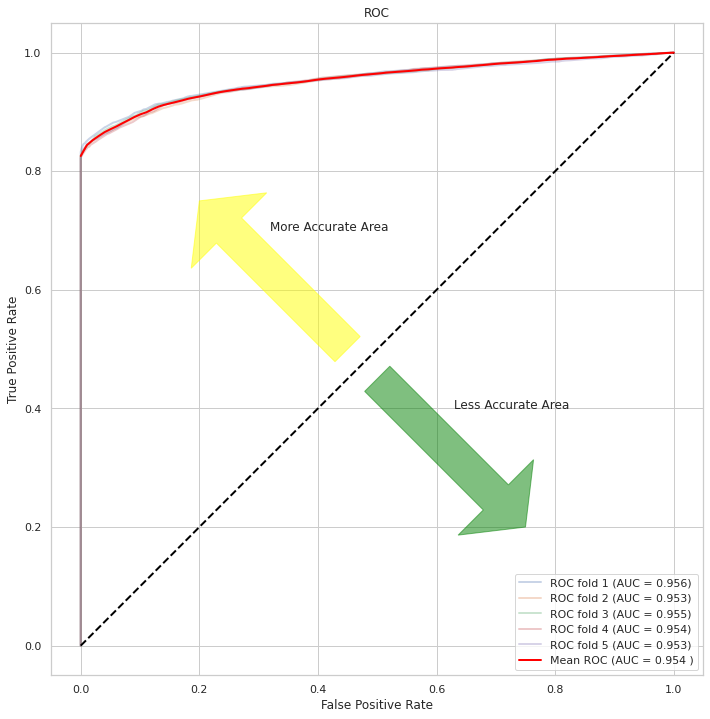

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from scipy import interp
import numpy as np
fig1 = plt.figure(figsize=[12,12])
ax1 = fig1.add_subplot(111,aspect = 'equal')
ax1.add_patch(
    patches.Arrow(0.45,0.5,-0.25,0.25,width=0.3,color='yellow',alpha = 0.5)
    )
ax1.add_patch(
    patches.Arrow(0.5,0.45,0.25,-0.25,width=0.3,color='green',alpha = 0.5)
    )
tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
i = 1
accScores = []
f1Scores = []
precisionScores = []
recallScores = []
for train,test in cv.split(X,y):
    prediction = lr.fit(X.iloc[train],y.iloc[train]).predict_proba(X.iloc[test])
    fpr, tpr, t = roc_curve(y.iloc[test], prediction[:, 1])
    roc_auc = auc(fpr, tpr)
    tprs.append(interp(mean_fpr, fpr, tpr))
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.3f)' % (i, roc_auc))
    #for other metric's result
    accScores.append(accuracy_score(y.iloc[test], prediction[:, 1].round()))
    f1Scores.append(f1_score(y.iloc[test], prediction[:, 1].round()))
    precisionScores.append(precision_score(y.iloc[test], prediction[:, 1].round()))
    recallScores.append(recall_score(y.iloc[test], prediction[:, 1].round()))
    i= i+1
plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='red',
         label=r'Mean ROC (AUC = %0.3f )' % (mean_auc),lw=2, alpha=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.text(0.32,0.7,'More Accurate Area',fontsize = 12)
plt.text(0.63,0.4,'Less Accurate Area',fontsize = 12)
plt.show()

In [ ]:
import statistics
print('mean acc: {}, acc std : {}'.format(statistics.mean(accScores)*100,statistics.stdev(accScores)))
print('f1 acc: {}, f1 std : {}'.format(statistics.mean(f1Scores)*100,statistics.stdev(f1Scores)))
print('precision acc: {}, precision std : {}'.format(statistics.mean(precisionScores)*100,statistics.stdev(precisionScores)))
print('recall acc: {}, recall std : {}'.format(statistics.mean(recallScores)*100,statistics.stdev(recallScores)))

mean acc: 91.68552909776841, acc std : 0.0024265983118010362
f1 acc: 91.02691491363119, f1 std : 0.002509481541858314
precision acc: 98.8597389621343, precision std : 0.001587387224954218
recall acc: 84.3446849882761, recall std : 0.00371250507620977
